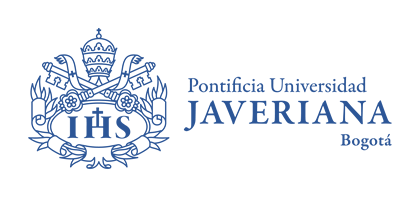

# Tecnologías emergentes - Taller Clustering

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Alejandro Enrique Suárez Acosta

# Importando Librerias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Carga de datos

In [2]:
data = pd.read_csv('2022.csv')
data

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


# Preprocesamiento de datos
Se limpian filas nulas y se eliminan columnas que no aportan información relevante al modelo.

In [3]:
# Eliminación de filas nulas
data.dropna(inplace=True)
data_clean = data.copy()

# Eliminación de columnas que no aportan información relevante
# Se eliminan las columnas "Whisker-high", "Whisker-low", "RANK" ya que no aportan información relevante al modelo, son redundantes con la columna "Happiness Score"
data_clean.drop("Whisker-high", axis=1, inplace=True)
data_clean.drop("Whisker-low", axis=1, inplace=True)
data_clean.drop("RANK", axis=1, inplace=True)
# Se eliminan las columnas "Country" ya que no aportan información relevante al modelo
data_clean.drop("Country", axis=1, inplace=True)

# Se cambian las "," por "."
data_clean.replace(',', '.', regex=True, inplace=True)
data_clean = data_clean.astype(float)
data_clean

,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,3.471,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034


# Análisis exploratorio de datos
Se realiza un análisis exploratorio de los datos para identificar la relación entre las variables y la variable objetivo, en este caso se elabora un mapa de calor para identificar la correlación entre las variables.

<Axes: >

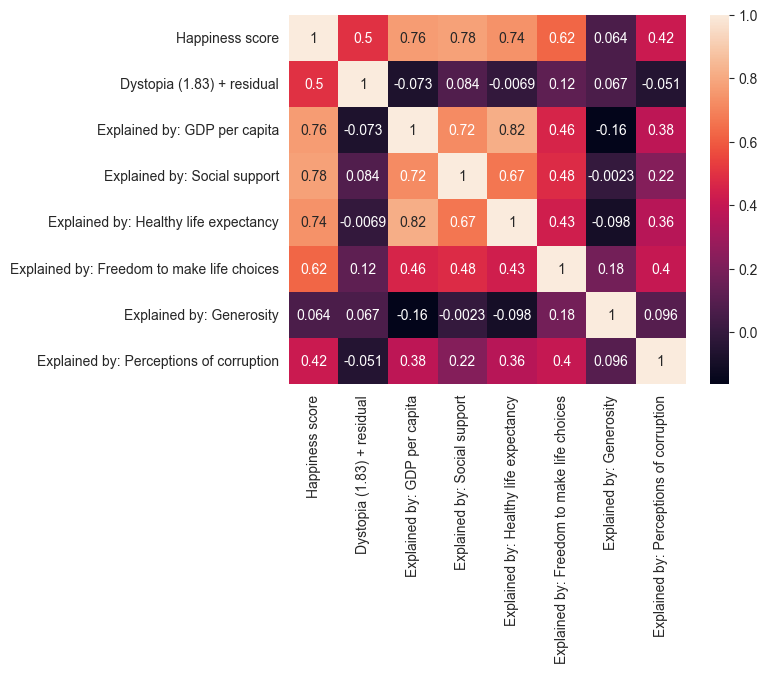

In [4]:
sns.heatmap(data_clean.corr(), annot=True)

# División de los datos
En este caso las variables predictoras son todas las columnas excepto "Happiness Score" y la variable objetivo es "Happiness Score".

In [5]:
X = data_clean.iloc[:, 1:].values
Y = data_clean.iloc[:, 0].values

# Se escalan los datos
sc = StandardScaler()
X = sc.fit_transform(X)

# Iteración 1, se usan todas las variables predictoras

### Ley del codo
Se usa la ley del codo para identificar el número óptimo de clusters.


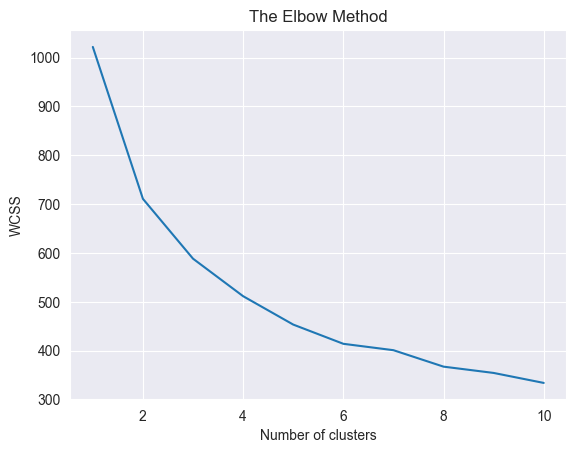

In [6]:
def plot_elbow(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
plot_elbow(X)

### Clustering con KMeans

In [7]:
def clustering(X, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    return y_kmeans

n_clusters = 6
y_kmeans = clustering(X, n_clusters)

### Visualización de los clusters

NameError: name 'kmeans' is not defined

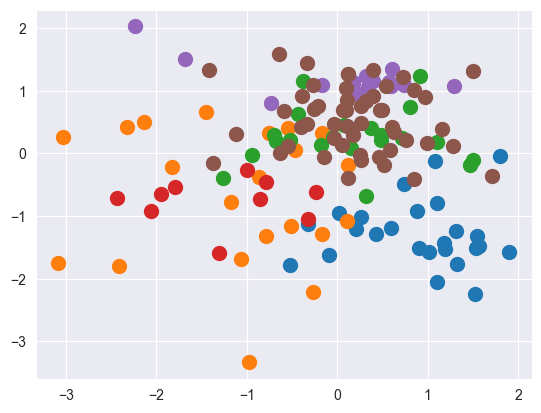

In [21]:
def plot_clusters(X, y_kmeans, n_clusters):
    
    for i in range(n_clusters):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 3], s=100, label=f'Cluster {i+1}')
    
    # Mostrar los centroides de los clusters
    # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    
    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()
    
plot_clusters(X, y_kmeans, n_clusters)

In [9]:
countries_clusters = pd.DataFrame(data["Country"])
countries_clusters["Cluster"] = y_kmeans
countries_clusters

,Country,Cluster
0,Finland,4
1,Denmark,4
2,Iceland,2
3,Switzerland,4
4,Netherlands,4
...,...,...
141,Botswana*,1
142,Rwanda*,3
143,Zimbabwe,1
144,Lebanon,1


In [11]:
fig = px.choropleth(countries_clusters,  # DataFrame de origen
                    locations='Country',  # Columna de los nombres de países
                    locationmode='country names',  # Modo de localización
                    color='Cluster',  # Columna de los números a usar para el color
                    color_continuous_scale='viridis',  # Escala de colores
                    labels={'Cluster': 'Cluster'},  # Etiqueta del colorbar
                    title='Mapa del mundo clasificado con clusters')  # Título del mapa

# Mostrar el mapa
fig.show()